In [ ]:
cd /content/drive/MyDrive/IBM

/content/drive/MyDrive/IBM


Import The ImageDataGenerator Library

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Configure ImageDataGenerator Class



In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,vertical_flip=True,horizontal_flip=True)

In [ ]:
test_data=ImageDataGenerator(rescale=1./255)

Apply ImageDataGenerator Functionality To Trainset and Testset

In [ ]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM/data/train",target_size=(64,64),class_mode="categorical",batch_size=128)

Found 15341 images belonging to 6 classes.


In [ ]:
x_test=test_data.flow_from_directory(r"/content/drive/MyDrive/IBM/data/test",target_size=(64,64),class_mode="categorical",batch_size=128)

Found 6825 images belonging to 6 classes.


In [ ]:
x_train.class_indices

{'Left Bundle Branch Block': 0,
 'Normal': 1,
 'Premature Atrial Contraction': 2,
 'Premature Ventricular Contractions': 3,
 'Right Bundle Branch Block': 4,
 'Ventricular Fibrillation': 5}

MODEL BUILDING

Import The Libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

Initialize the model



In [ ]:
model=Sequential()

Adding CNN Layers

In [ ]:
model.add(Convolution2D(32,(3,3),activation="relu",strides=(1,1),input_shape=(64,64,3)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


Adding Dense LayerS

Hidden Layer



In [ ]:
model.add(Dense(500,activation="relu"))

Output Layer

In [ ]:
model.add(Dense(6,activation="softmax"))

Configure The Learning Process

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
len(x_train)

120

Train The Model



In [ ]:
model.fit(x_train,epochs=5,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/5
120/120 [==============================] - 2784s 23s/step - loss: 1.7028 - accuracy: 0.5489 - val_loss: 1.2224 - val_accuracy: 0.5118
Epoch 2/5
120/120 [==============================] - 126s 1s/step - loss: 0.7792 - accuracy: 0.7384 - val_loss: 0.9141 - val_accuracy: 0.6695
Epoch 3/5
120/120 [==============================] - 125s 1s/step - loss: 0.5963 - accuracy: 0.8100 - val_loss: 0.7498 - val_accuracy: 0.7247
Epoch 4/5
120/120 [==============================] - 126s 1s/step - loss: 0.4751 - accuracy: 0.8512 - val_loss: 0.5996 - val_accuracy: 0.7940
Epoch 5/5
120/120 [==============================] - 127s 1s/step - loss: 0.4091 - accuracy: 0.8720 - val_loss: 0.6121 - val_accuracy: 0.8045


In [ ]:
model.fit(x_train,epochs=5,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/5
120/120 [==============================] - 134s 1s/step - loss: 0.3552 - accuracy: 0.8900 - val_loss: 0.5803 - val_accuracy: 0.8048
Epoch 2/5
120/120 [==============================] - 133s 1s/step - loss: 0.3138 - accuracy: 0.9048 - val_loss: 0.5717 - val_accuracy: 0.8120
Epoch 3/5
120/120 [==============================] - 137s 1s/step - loss: 0.2908 - accuracy: 0.9115 - val_loss: 0.5486 - val_accuracy: 0.8227
Epoch 4/5
120/120 [==============================] - 133s 1s/step - loss: 0.2673 - accuracy: 0.9177 - val_loss: 0.5577 - val_accuracy: 0.8344
Epoch 5/5
120/120 [==============================] - 137s 1s/step - loss: 0.2454 - accuracy: 0.9271 - val_loss: 0.4420 - val_accuracy: 0.8549


In [ ]:
model.fit(x_train,epochs=5,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/5
120/120 [==============================] - 138s 1s/step - loss: 0.2268 - accuracy: 0.9319 - val_loss: 0.4620 - val_accuracy: 0.8589
Epoch 2/5
120/120 [==============================] - 137s 1s/step - loss: 0.2084 - accuracy: 0.9377 - val_loss: 0.4250 - val_accuracy: 0.8696
Epoch 3/5
120/120 [==============================] - 136s 1s/step - loss: 0.1951 - accuracy: 0.9429 - val_loss: 0.4327 - val_accuracy: 0.8651
Epoch 4/5
120/120 [==============================] - 134s 1s/step - loss: 0.1868 - accuracy: 0.9446 - val_loss: 0.4079 - val_accuracy: 0.8731
Epoch 5/5
120/120 [==============================] - 133s 1s/step - loss: 0.1741 - accuracy: 0.9475 - val_loss: 0.4233 - val_accuracy: 0.8692


Save The Model

In [ ]:
model.save('arrhythmia.h5')

Testing The Model

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('arrhythmia.h5')

In [ ]:
img=image.load_img("/content/drive/MyDrive/IBM/data/test/Right Bundle Branch Block/fig_101.png",target_size=(64,64))

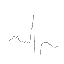

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [ ]:
pred=model.predict(x)

1/1 [==============================] - 0s 169ms/step


In [ ]:
pred

array([[0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
index=['Left Bundle Branch Block',
 'Normal',
 'Premature Atrial Contraction',
 'Premature Ventricular Contractions',
 'Right Bundle Branch Block',
 'Ventricular Fibrillation']

In [ ]:
index[np.argmax(pred)]

'Right Bundle Branch Block'